# Machine Learning Week 2
### Regression Notes by Cyril Michino
1. Day 1: Linear Regression
2. Day 2: Polynomial Regression
3. Day 3: Regularised Regression
4. Day 4: Logistic Regression (Classification)
5. Day 5: Regression Weekly Project

## Day 1: Linear Regression
1. Understanding how linear regression works
2. Exploring and preparing data for regression
2. Building a linear regression with Scikit Learn
3. Evaluating performance of a linear regression
4. Visualising the output of a regression (coefficients)

In [43]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer, StandardScaler

### Scikit Learn Diabetis Toy Dataset
Documentation on the Dataset features can be found [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)
- The features are attributes of a patient as follows:
    - `age` age in years
    - `sex` gender/sex
    - `bmi` body mass index
    - `bp` average blood pressure
    - `s1` tc, total serum cholesterol
    - `s2` ldl, low-density lipoproteins
    - `s3` hdl, high-density lipoproteins
    - `s4` tch, total cholesterol / HDL
    - `s5` ltg, possibly log of serum triglycerides level
    - `s6` glu, blood sugar level
- The target is the measure of disease progression
- **Objective:** Predict the disease progression based on the features available

In [45]:
diabetis = load_diabetes(scaled=False) #Data is already scaled by default
X = diabetis.data
y = diabetis.target

print(X.shape, y.shape)

(442, 10) (442,)


### Data Exploration

In [4]:
df = pd.DataFrame(X, columns=diabetis.feature_names)
df['progression'] = y ## Target variable
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [11]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


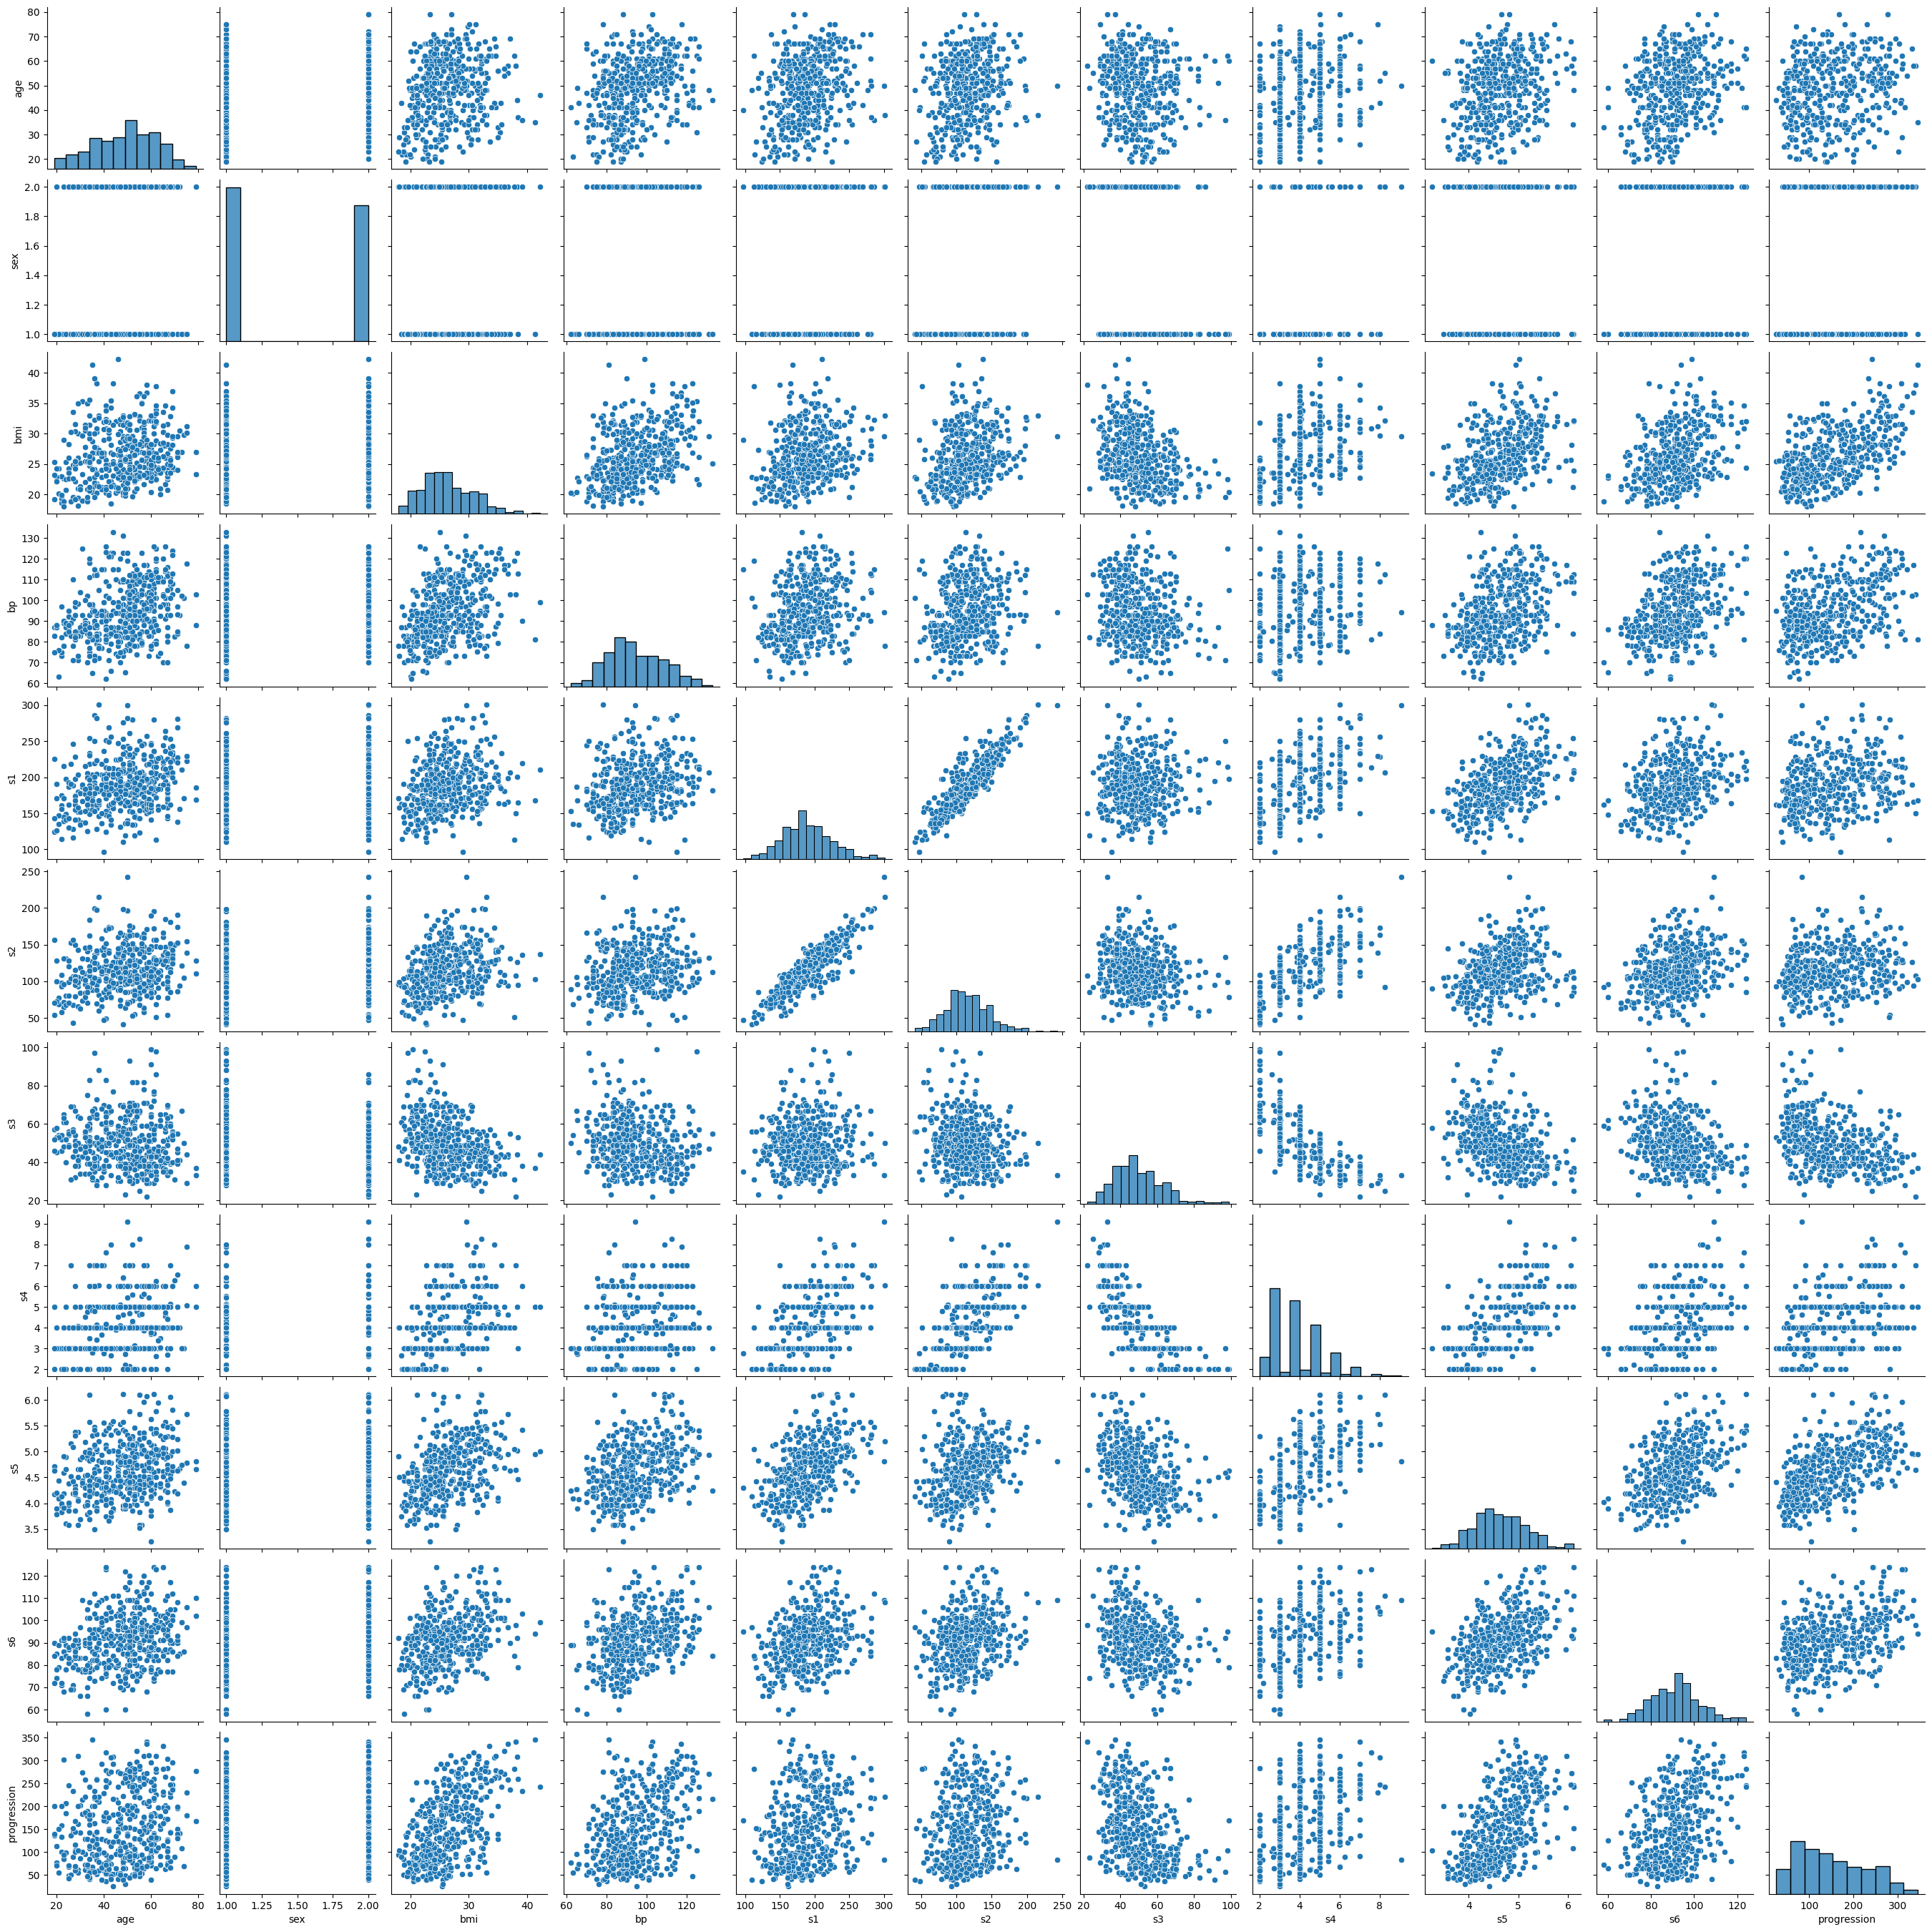

In [5]:
## Visualise the dataset with scatter plots
sns.pairplot(df)
plt.show()

### Building a Linear Regression Model

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 10) (89, 10) (353,) (89,)


In [47]:
model = LinearRegression()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(math.sqrt(mse),r2)

64.72786550400932 0.3511605615121165


In [48]:
print('Coefficients: ', model.coef_) #Get the coefficients for all the features in the dataset
print('Y-Intercept: ', model.intercept_) #The intercept of the model or the constant in the regression equation

Coefficients:  [ 8.82875005e-02 -2.23311488e+01  6.02161395e+00  1.04455692e+00
 -1.39634880e+00  9.03278029e-01  6.18163619e-01  6.94721527e+00
  7.89639530e+01  7.59207959e-02]
Y-Intercept:  -351.0240504388586


### Daily Challenge - Abalone Age Prediction
We’ll use this data across the entire week as we gradually advance our regression model. You can access the data [here](https://archive.ics.uci.edu/dataset/1/abalone)
1. Make sure the data values are all in numbers (Encode if you have to)
2. Make sure there are no missing values (Either you drop or impute)
3. Split data into train and test data (20% test data)
4. Fit a simple linear regression model and compute the mean squared error (MSE)
5. On the thread below, comment your: MSE, Intercept, and Coefficients
The dataset chosen is fairly clean, so that you can focus on learning regression concepts in isolation from the data preparation layer which you covered last week.


## Day 2: Polynomial Regression
1. Should we standardise data for regression? What is the effect on coefficient interpretability?
2. Evaluating regression models: R2, P-Values, F-Values (Statistics)
2. Polynomial and Logarithmic Transformation of Features
3. Building Pipelines with Scikit Learn
4. Daily Challenge: Add feature transformations and gauge effect on your MSE

In [56]:
model1 = make_pipeline(StandardScaler(),PolynomialFeatures(degree=2),LinearRegression())
model1 = model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(math.sqrt(mse),r2)

72.96056637825939 0.1756131386307498


In [58]:
model2 = make_pipeline(FunctionTransformer(func=np.log),LinearRegression())
model2 = model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(math.sqrt(mse),r2)

65.78883468695048 0.3297156863253764


/var/folders/35/13d00tc92bb7m81x0w1lfh5r0000gn/T/ipykernel_42313/230007578.py:7: RuntimeWarning: invalid value encountered in log2
  z = np.log2(x)


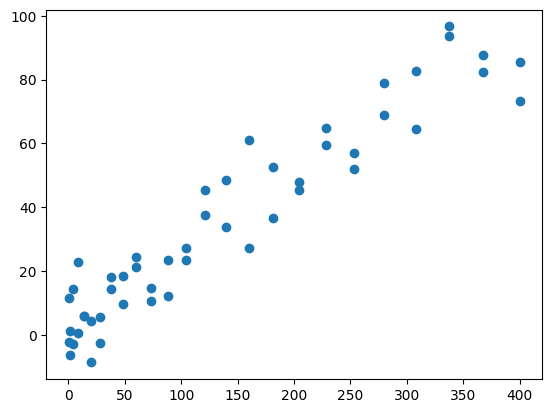

In [28]:
## Generate random data
distr = np.linspace(-10,10,50)
noise = np.random.normal(0,10,50)

x = 2*distr
y = distr**2 + noise
z = np.log2(x)

plt.scatter(x**2,y)
#plt.plot(x,z)

### Daily Challenge - Abalone Age Prediction
We’ll use this data across the entire week as we gradually advance our regression model. You can access the data [here](https://archive.ics.uci.edu/dataset/1/abalone)
1. Make sure the data values are all in numbers (Encode if you have to)
2. Make sure there are no missing values (Either you drop or impute)
3. Split data into train and test data (20% test data)
4. Fit a simple linear regression model and compute the mean squared error (MSE)
5. On the thread below, comment your: MSE, Intercept, and Coefficients
The dataset chosen is fairly clean, so that you can focus on learning regression concepts in isolation from the data preparation layer which you covered last week.
